<a href="https://colab.research.google.com/github/Gustavo-Martinez-Gutierrez/Gustavo_portfolio/blob/main/4_An%C3%A1lisis_de_Datos_Aplicados_a_la_Gesti%C3%B3n_Probabilidad_y_Estad%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

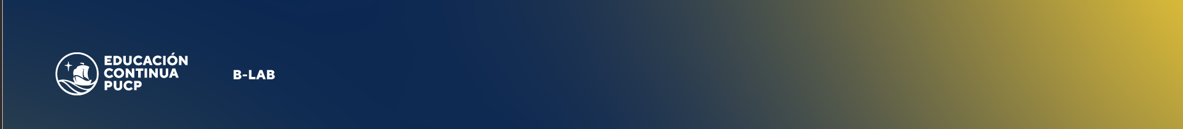


## Tema 3: Introducción a la Probabilidad y Estadística

En esta sesión mostraremos algunos ejemplos de aplicación del teorema central del límite (TCL), así como algunos ejemplos de inferencia estadística.

In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Al igual que en la sesión anterior, montamos el drive para que Colab pueda acceder directamente.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Abrimos el archivo con el que trabajamos en la sesión anterior:

In [ ]:
ruta = '/content/drive/MyDrive/sumaria-2022.dta'
data = pd.read_stata(ruta)

In [ ]:
data.shape

(34213, 167)

In [ ]:
data.head()

,aÑo,mes,conglome,vivienda,hogar,ubigeo,dominio,estrato,mieperho,totmieho,...,estrsocial,factor07,ld,linpe,linea,pobreza,lineav,pobrezav,nconglome,sub_conglome
0,2022,01,005030,008,11,010201,selva,"de 20,000 a 49,999 habitantes",2,2,...,d,106.890244,0.809237,223.765335,378.169434,no pobre,636.334351,no vulnerable,006618,00
1,2022,01,005030,017,11,010201,selva,"de 20,000 a 49,999 habitantes",2,2,...,d,106.890244,0.809237,223.765335,378.169434,no pobre,662.069275,no vulnerable,006618,00
2,2022,01,005030,033,11,010201,selva,"de 20,000 a 49,999 habitantes",4,4,...,d,106.890244,0.809237,223.765335,378.169434,no pobre,662.475037,vulnerable no pobre,006618,00
3,2022,01,005030,050,11,010201,selva,"de 20,000 a 49,999 habitantes",3,3,...,d,106.890244,0.809237,223.765335,378.169434,no pobre,652.384521,vulnerable no pobre,006618,00
4,2022,01,005030,059,11,010201,selva,"de 20,000 a 49,999 habitantes",11,11,...,d,106.890244,0.809237,223.765335,378.169434,pobre no extremo,654.640137,pobre no extremo,006618,00


En esta base de datos, la variable que identifica el ingreso bruto anual es la de inghog1d. Por lo tanto, el primer paso es calcular los estadísticos descriptivos de esta variable y, posteriormente, analizar la distribución del ingreso. Como complemento, pondremos un gráfico de una distribución normal para fines de comparación.

In [ ]:
data['inghog1d'].describe().apply('{:9.2f}'.format)

count      34213.00
mean       37660.39
std        40128.23
min            0.00
25%        14525.89
50%        26498.24
75%        46429.38
max      1245651.38
Name: inghog1d, dtype: object

In [ ]:
plt.hist(data['inghog1d'],bins=200)
plt.show()

In [ ]:
# Calculamos la media y la desviación estándar de los datos.
mean = data['inghog1d'].mean()
std = data['inghog1d'].std()

# Definimos el número de bins:
nbins = 200

# Creamos el histograma con 100 bins
plt.hist(data['inghog1d'], bins=nbins)

# Generamos un rango de valores para la distribución normal
x = np.linspace(mean - 3*std, mean + 3*std, nbins)

# Calculamos la función de probabilidad de la distribución normal (PDF)
y = np.exp(-(x - mean)**2 / (2 * std**2)) / (std * np.sqrt(2 * np.pi))

# Normalizamos los valores de la PDF para escalarlos con el eje y de la data original
y_scaled = y * len(data['inghog1d']) / np.sum(y)

# Graficamos la distribución encima del histograma.
plt.plot(x, y_scaled, color='red', linewidth=2)

# Añadimos títulos
plt.xlabel('Ingreso anual del hogar')
plt.ylabel('Frecuencia')
plt.title('Histograma del ingreso anual del hogar con distribución normal')

# Mostramos el gráfico
plt.show()


## Teorema Central del Límite

Como pueden ver, la distribución del ingreso en el Perú no es normal (lo cual es esperable). Sin embargo, según el TCL, si calculamos el promedio del ingreso de varias muestras, éste promedio debería converger al de una distribución normal.
Vamos a tomar muestras aleatorias con distintos tamaños de muestra para ver si en efecto el promedio de estas muestras converge al de una distribución normal.

La media muestral con muestra de 5000 es de: 37658.07835358969
La desviación estándar con muestra de 5000 es de: 532.9805806895389


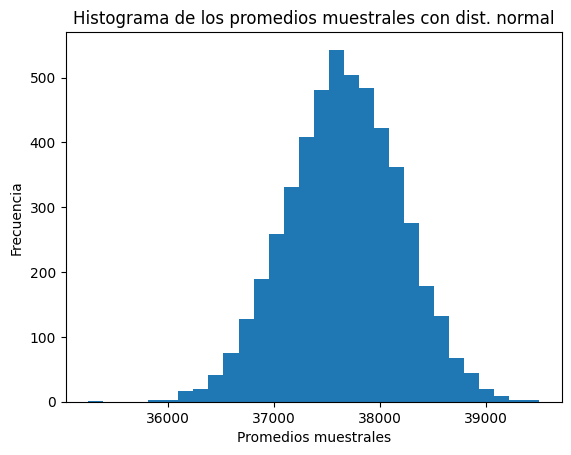

In [ ]:
# Comenzamos con 30 datos y luego los graficamos:
# Progresivamente subimos con 100, 300, 1000, 2000 y 5000.

# Definimos el tamaño muestral y una lista donde guardamos los promedios de cada
# iteración de la muestra
n = 5000
sample_means = []

# También calculamos el promedio y la desv. estándar del ingreso anual
mean = data['inghog1d'].mean()
std = data['inghog1d'].std()

for i in range(n):
    # Generamos la muestra
    sample = data['inghog1d'].sample(n)
    # Calculamos la media muestral
    sample_mean = sample.mean()
    # Añadimos la muestra a la lista
    sample_means.append(sample_mean)

# Mostramos la media y la desviación estándar de la muestra:
print('La media muestral con muestra de {} es de: {}'.format(n, np.mean(sample_means)))
print('La desviación estándar con muestra de {} es de: {}'.format(n, np.std(sample_means)))

# Creamos el histograma
plt.hist(sample_means, bins=30)

# Títulos
plt.xlabel('Promedios muestrales')
plt.ylabel('Frecuencia')
plt.title('Histograma de los promedios muestrales con dist. normal')

# Mostramos el gráfico
plt.show()

## Inferencia Estadística

Queremos saber si una muestra aleatoria proviene de la misma población del ejemplo anterior. Primero definimos nuestra hipótesis nula H0: "La muestra proviene de esta población".
Partiendo del ejemplo anterior, sabemos lo siguiente:

In [ ]:
mean = data['inghog1d'].mean()
std = data['inghog1d'].std()
count = data['inghog1d'].count()

stdofmean = std/(np.sqrt(count))

In [ ]:
print('La media poblacional es de: {}'.format(mean))
print('La desviación estándar es de: {}'.format(std))
print('La desviación estándar de la media es de: {}'.format(stdofmean))

La media poblacional es de: 37660.38543126419
La desviación estándar es de: 40128.228273979934
La desviación estándar de la media es de: 216.9473784974932


Luego, si la distribución de la media muestral es normal, podemos calcular lo siguiente:

In [ ]:
print('La media menos 2 desv. estándar es: {}'.format(mean - 2*stdofmean))
print('La media menos 1 desv. estándar es: {}'.format(mean - 1*stdofmean))
print('La media mas 1 desv. estándar es: {}'.format(mean + 1*stdofmean))
print('La media mas 2 desv. estándar es: {}'.format(mean + 2*stdofmean))

La media menos 2 desv. estándar es: 37226.490674269204
La media menos 1 desv. estándar es: 37443.4380527667
La media mas 1 desv. estándar es: 37877.33280976168
La media mas 2 desv. estándar es: 38094.28018825918


¿Qué quiere decir esto? Aproximadamente, el 95%  de todas las muestras tendrá una media que está +/- dos desviaciones estándar respecto a la media, es decir, entre 37226.49 y 38094.28. Solo el 5% de las muestras puede estar por debajo o por encima de dicha cota.
Si elegimos 0.05 como el nivel de significancia de esta prueba, cualquier muestra con un valor inferior a 37226.49 y 38094.28 nos llevará a concluir que esa muestra no proviene de dicha población.
Si obtenemos una muestra aleatoria de 100 casos y obtenemos un promedio de S/ 40000, ¿qué concluimos?
* El promedio de esta muestra cae dentro del rango que observaríamos solo 5 de cada 100 veces si la hipótesis nula fuera verdadera y la muestra efectivamente pertenece a esa población.
* Podemos rechazar la hipótesis nula al nivel de significancia 0.05.
* En promedio, 95 de cada 100 veces se habrá rechazado correctamente la hipótesis nula y 5 veces estaremos equivocados.

Sin embargo, para poder darle más rigurosidad a la explicación, queremos saber el p-valor asociado a este resultado. El p-valor (p-value) es la probabilidad de obtener un resultado al menos tan extremo como el observado si la hipótesis nula es verdadera.
El ingreso promedio de la muestra es de S/ 40000 anuales, que se encuentra a este número de desviaciones estándar:

In [ ]:
ans = (40000 - mean)/stdofmean
print(ans)

10.784249088139322


La probabilidad de que esta muestra provenga de la población es menor a 0.0001.